# SVM и его ядра
__Суммарное количество баллов: 10__

### Задание 1 (7 баллов)

Примените метод SVM (например, из библиотеки sklearn) для датасета blobs2.

Визуализируйте результат (разбиение плоскости и опорные вектора) при разных вариантах ядер (линейное; полиномиальное степеней 2,3,5; RBF).

In [20]:
import pandas as pd
from sklearn.svm import SVC 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df = pd.read_csv("./blobs2.csv")
X = df.iloc[:, 0:2]
y = df.label

In [37]:
model = SVC(kernel='linear')
model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

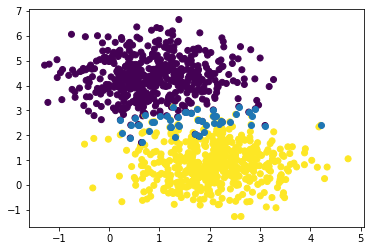

In [45]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

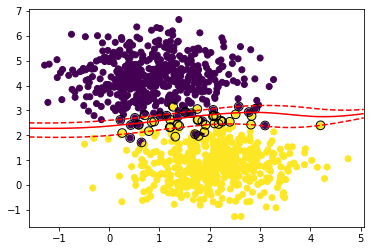

In [60]:
def vizualize(X, y, model):
    ax = plt.gca()
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y) # Points
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1])
    yy = np.linspace(ylim[0], ylim[1])
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)
    ax.contour(XX, YY, Z, colors='red', levels=[-1, 0, 1], # Lines
               linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=75, # Support vectors 
                facecolors='none', edgecolors='black')
    plt.show()
vizualize(X,y, model)

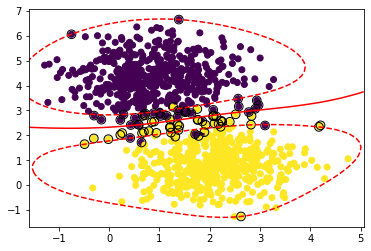

In [61]:
model = SVC(kernel='rbf')
model.fit(X, y)
vizualize(X,y, model)

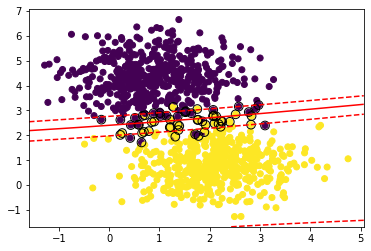

In [62]:
model = SVC(kernel='poly', degree = 2)
model.fit(X, y)
vizualize(X,y, model)

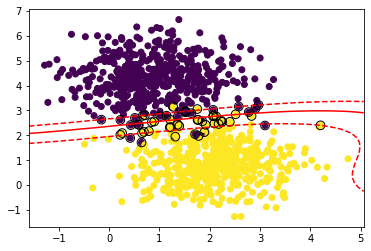

In [63]:
model = SVC(kernel='poly', degree = 3)
model.fit(X, y)
vizualize(X,y, model)

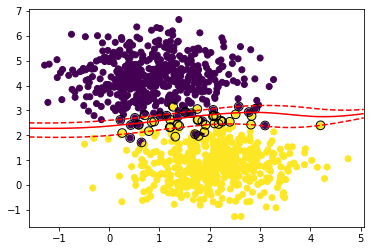

In [64]:
model = SVC(kernel='poly', degree = 5)
model.fit(X, y)
vizualize(X,y, model)

### Задание 2 (3 балла)

Примените метод SVM на датасетах cancer и spam, разбитый предварительно на train (80%) и validate (20%). 

Сравните время работы SVM и Random Forest при близкой точности.

In [71]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("./spam.csv")
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
model = SVC()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.7166123778501629

In [84]:
df = pd.read_csv("./cancer.csv")
X = df.iloc[:, 1:]
y = df.iloc[:, 0].map(lambda x: x == "M")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = SVC()
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.9035087719298246

In [89]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

0.9385964912280702

In [102]:
import time
start = time.perf_counter()
model = SVC()
model.fit(X_train,y_train)
model.score(X_test, y_test)
end = time.perf_counter()
print("SVM time:", end-start)

SVM time: 0.013138738999259658


In [101]:
start = time.perf_counter()
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test, y_test)
end = time.perf_counter()
print("Random forest time:", end-start)

Random forest time: 0.16544805600278778


Разница в 10 раз